<a href="https://colab.research.google.com/github/NishatVasker/Feeding_Nation_Main_Research/blob/main/Fedding_Nation_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle


In [2]:
from google.colab import files
uploaded = files.upload()


Saving kaggle (2).json to kaggle (2).json


In [4]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!kaggle datasets download -d nafishamoin/bangladeshi-crops-disease-dataset


100% 6.44G/6.45G [01:30<00:00, 133MB/s]
100% 6.45G/6.45G [01:30<00:00, 76.4MB/s]


In [ ]:
!unzip bangladeshi-crops-disease-dataset.zip


In [8]:
import os
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib import image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import keras
from keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Reshape, LSTM
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.losses import CategoricalCrossentropy
from keras.optimizers import Adam
from keras.applications import MobileNetV2

In [13]:
dir = '/content/CropDisease/Crop___DIsease'
labels = os.listdir(dir)
labels

['Potato___Healthy',
 'Corn___Healthy',
 'Wheat___Healthy',
 'Potato___Late_Blight',
 'Rice___Leaf_Blast',
 'Wheat___Brown_Rust',
 'Rice___Healthy',
 'Corn___Gray_Leaf_Spot',
 'Potato___Early_Blight',
 'Rice___Brown_Spot',
 'Wheat___Yellow_Rust',
 'Corn___Common_Rust',
 'Invalid',
 'Corn___Leaf_Blight',
 'Rice___Hispa']

In [12]:
for label in labels:
    print(label, len(os.listdir(dir+'/'+label)))

Potato___Healthy 2006
Corn___Healthy 3718
Wheat___Healthy 1497
Potato___Late_Blight 3131
Rice___Leaf_Blast 1182
Wheat___Brown_Rust 1128
Rice___Healthy 523
Corn___Gray_Leaf_Spot 3284
Potato___Early_Blight 3149
Rice___Brown_Spot 563
Wheat___Yellow_Rust 1156
Corn___Common_Rust 3814
Invalid 1563
Corn___Leaf_Blight 3816
Rice___Hispa 523


In [ ]:
for label in labels:
    path = os.listdir(dir + '/' + label)
    img = dir + '/' + label + '/' + path[1]
    plt.title(label)
    plt.xlabel("X pixel scaling")
    plt.ylabel("Y pixels scaling")
    image = mpimg.imread(img)
    plt.imshow(image)
    plt.show()

In [14]:
datagen = ImageDataGenerator(
    samplewise_center=True,
    rotation_range=10,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,
    validation_split=0.20
)

train_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)
test_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)
validation_data = datagen.flow_from_directory(
    dir,
    target_size=(64,64),
    batch_size=32,
    shuffle=False,
    subset='validation'
)

Found 24850 images belonging to 15 classes.
Found 6203 images belonging to 15 classes.
Found 6203 images belonging to 15 classes.


In [ ]:
img_iter = datagen.flow_from_directory(dir,
                                       target_size=(64,64),
                                       batch_size=32)
x, y = img_iter.next()
fig, ax = plt.subplots(nrows=4, ncols=8)
for i in range(32):
    image = x[i]
    ax.flatten()[i].imshow(np.squeeze(image))
plt.show()

**If RUN THIS FOR TRAINING EPOCH then change other cell history with base_model**

In [ ]:
model=Sequential()
size=(64,64,3)
model.add(Conv2D(filters=8, kernel_size=(3,3), strides=(1,1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(16, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))##class number,in example i have 8 classes so i have given 15

#Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

#Training the model
base_model = model.fit(train_data, steps_per_epoch=len(train_data), epochs=2, validation_data=validation_data, validation_steps=len(validation_data))


Epoch 1/2
777/777 [==============================] - 695s 893ms/step - loss: 0.9735 - accuracy: 0.6626 - val_loss: 0.7211 - val_accuracy: 0.7658
Epoch 2/2
777/777 [==============================] - 666s 857ms/step - loss: 0.4529 - accuracy: 0.8375 - val_loss: 0.5813 - val_accuracy: 0.8270


**Train the model and store the history:**

# **NORMALLY RUN THIS FOR TRAINING EPOCH**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define your model
model = Sequential()
size = (64, 64, 3)
model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))

# Compiling the model
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

# Training the model
history = model.fit(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=validation_data, validation_steps=len(validation_data))


Epoch 1/5
777/777 [==============================] - 620s 795ms/step - loss: 1.0788 - accuracy: 0.6192 - val_loss: 0.8864 - val_accuracy: 0.7372
Epoch 2/5
777/777 [==============================] - 623s 803ms/step - loss: 0.5291 - accuracy: 0.8096 - val_loss: 0.5949 - val_accuracy: 0.8312
Epoch 3/5
777/777 [==============================] - 646s 832ms/step - loss: 0.3908 - accuracy: 0.8575 - val_loss: 0.5009 - val_accuracy: 0.8531
Epoch 4/5
777/777 [==============================] - 642s 826ms/step - loss: 0.3251 - accuracy: 0.8801 - val_loss: 0.5816 - val_accuracy: 0.8607
Epoch 5/5
777/777 [==============================] - 652s 839ms/step - loss: 0.2892 - accuracy: 0.8924 - val_loss: 0.4138 - val_accuracy: 0.8828


**Save the model and history to files:**

In [18]:
# Save the model's weights
model.save('model_weights.h5')

# Save the history to a text file
with open('training_history.txt', 'w') as file:
    file.write(str(history.history))


# **In subsequent sessions, you can load the model and history and continue training or analyze the results without retraining:**

In [19]:
from tensorflow.keras.models import load_model

# Load the model
model = Sequential()
size = (64, 64, 3)
model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))

model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])

model.load_weights('model_weights.h5')

# Load the history
import ast

with open('training_history.txt', 'r') as file:
    history_str = file.read()
    history = ast.literal_eval(history_str)

# You can use the loaded history to visualize the results or continue training


In [25]:
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


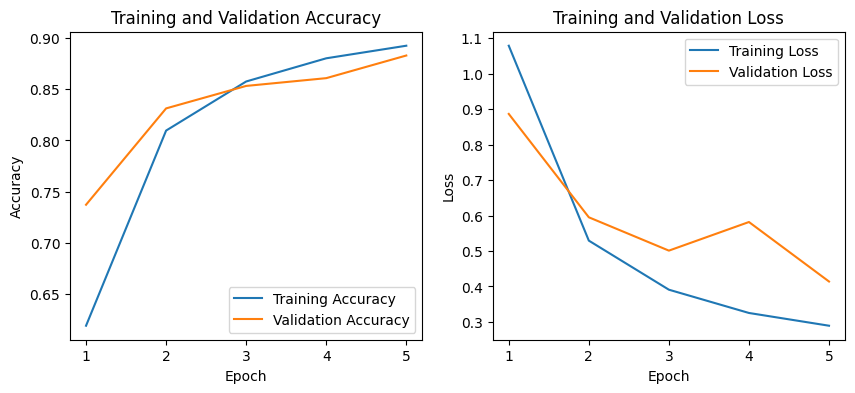

In [29]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [30]:
score = model.evaluate(test_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

194/194 [==============================] - 119s 610ms/step - loss: 0.4032 - accuracy: 0.8825
Test loss: 0.4031846523284912
Test accuracy: 0.8824762105941772


194/194 [==============================] - 115s 595ms/step - loss: 0.4136 - accuracy: 0.8793


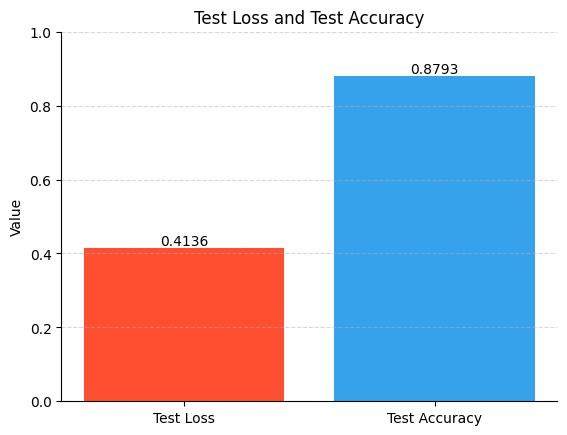

In [31]:
import matplotlib.pyplot as plt

# Calculate test loss and test accuracy
score = model.evaluate(test_data)
test_loss = score[0]
test_accuracy = score[1]

# Create labels and values for the plot
labels = ['Test Loss', 'Test Accuracy']
values = [test_loss, test_accuracy]

# Set colors for the bars
colors = ['#FF4F30', '#36A2EB']

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the bar chart
bars = ax.bar(labels, values, color=colors)

# Add labels and values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height,
            f'{height:.4f}', ha='center', va='bottom')

# Customize the plot
plt.ylabel('Value')
plt.title('Test Loss and Test Accuracy')
plt.ylim([0, 1])  # Set y-axis limit to range from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add horizontal grid lines

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.show()

In [37]:
# Evaluate the model on the train, test, and validation data
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Print out the validation accuracies for the train, test, and validation data
print('Train accuracy:', train_acc)
print('Test accuracy:', test_acc)
print('Validation accuracy:', val_acc)

Train accuracy: 0.9019718170166016
Test accuracy: 0.8831210732460022
Validation accuracy: 0.8795744180679321


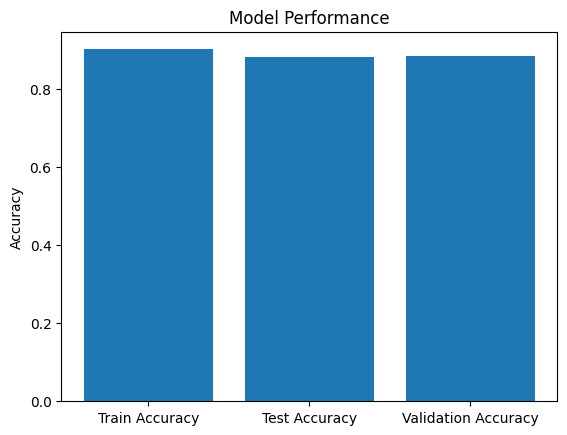

In [33]:
import matplotlib.pyplot as plt

# Calculate train, test, and validation accuracies
train_acc = model.evaluate(train_data, verbose=0)[1]
test_acc = model.evaluate(test_data, verbose=0)[1]
val_acc = model.evaluate(validation_data, verbose=0)[1]

# Create labels and values for the plot
labels = ['Train Accuracy', 'Test Accuracy', 'Validation Accuracy']
values = [train_acc, test_acc, val_acc]

# Plot the diagram
plt.bar(labels, values)
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.show()

In [34]:
predict=model.predict(test_data)
# predict the class label
y_classes = predict.argmax(axis=-1)
y_classes

194/194 [==============================] - 107s 552ms/step


array([ 0,  0,  0, ..., 14, 14, 14])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test data
predict = model.predict(test_data)

# Get the predicted class labels
y_classes = predict.argmax(axis=-1)

# Count the occurrences of each class label
unique_labels, label_counts = np.unique(y_classes, return_counts=True)

# Plot the graph
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Predicted Class Labels')
plt.show()

194/194 [==============================] - 110s 570ms/step


ValueError: ignored

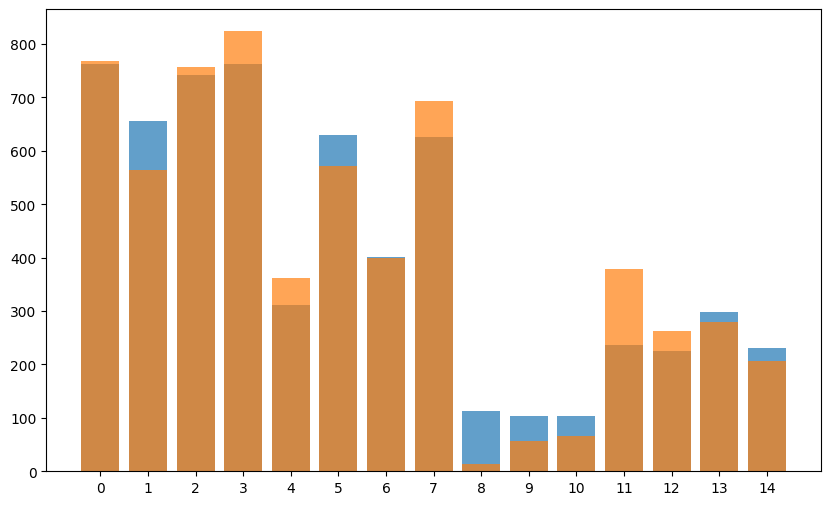

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_data)

# Get the true labels and predicted labels
true_labels = test_data.classes
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(15), np.bincount(true_labels), label='True Labels', alpha=0.7)
plt.bar(range(15), np.bincount(predicted_labels), label='Predicted Labels', alpha=0.7)
plt.xticks(range(15), labels, rotation=90)
plt.xlabel('Crop Disease Class')
plt.ylabel('Count')
plt.title('True vs. Predicted Labels')
plt.legend()
plt.show()


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.model_selection import KFold


# **K-FOLD PART**

In [40]:
model = Sequential()
size = (64, 64, 3)
model.add(Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=size))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(15, activation='softmax'))
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])


In [ ]:
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Lists to store training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []

for train_index, val_index in kf.split(train_data):
    train_data_fold = np.array(train_data)[train_index]
    val_data_fold = np.array(train_data)[val_index]

    history = model.fit(train_data_fold, steps_per_epoch=len(train_data_fold), epochs=5,
                        validation_data=val_data_fold, validation_steps=len(val_data_fold))

    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])


In [ ]:
import matplotlib.pyplot as plt

# Average training and validation accuracies across all folds
mean_train_acc = np.mean(train_accuracies, axis=0)
mean_val_acc = np.mean(val_accuracies, axis=0)

# Number of epochs
epochs = range(1, len(mean_train_acc) + 1)

# Plot training and validation accuracies for each epoch
plt.figure(figsize=(10, 5))
plt.plot(epochs, mean_train_acc, label='Training Accuracy')
plt.plot(epochs, mean_val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('K-Fold Cross-Validation')
plt.show()


# **PLOT DIAGRAM**

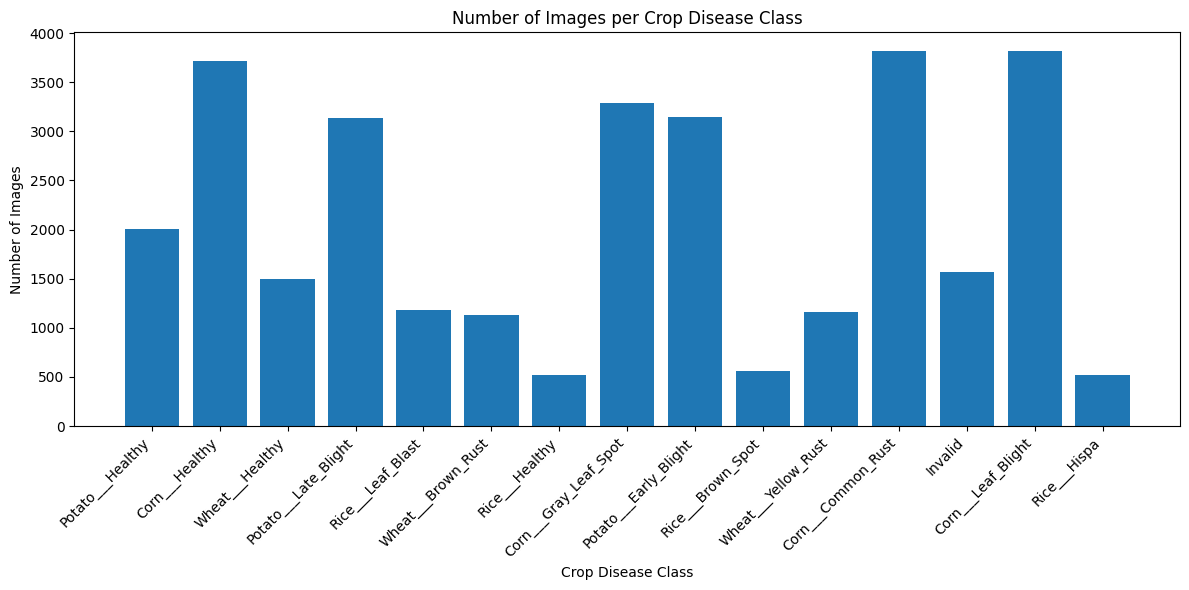

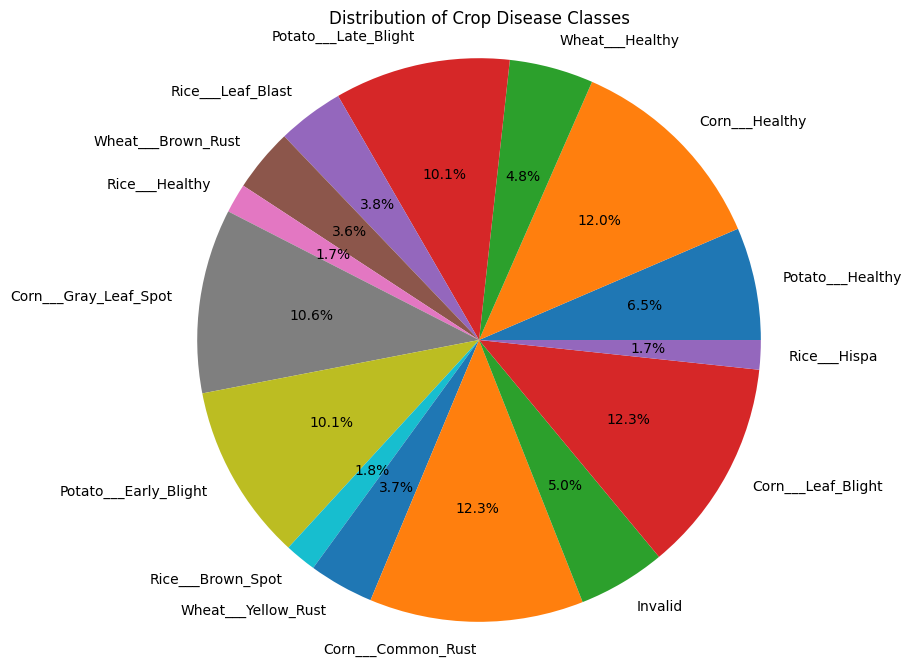

In [1]:
import matplotlib.pyplot as plt

labels = ['Potato___Healthy', 'Corn___Healthy', 'Wheat___Healthy', 'Potato___Late_Blight', 'Rice___Leaf_Blast',
          'Wheat___Brown_Rust', 'Rice___Healthy', 'Corn___Gray_Leaf_Spot', 'Potato___Early_Blight',
          'Rice___Brown_Spot', 'Wheat___Yellow_Rust', 'Corn___Common_Rust', 'Invalid', 'Corn___Leaf_Blight',
          'Rice___Hispa']

num_images_per_class = [2006, 3718, 1497, 3131, 1182, 1128, 523, 3284, 3149, 563, 1156, 3814, 1563, 3816, 523]

# Bar Chart showing the number of images per class
plt.figure(figsize=(12, 6))
plt.bar(labels, num_images_per_class)
plt.xlabel('Crop Disease Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Crop Disease Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Pie Chart showing the distribution of classes
plt.figure(figsize=(8, 8))
plt.pie(num_images_per_class, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Crop Disease Classes')
plt.axis('equal')
plt.show()


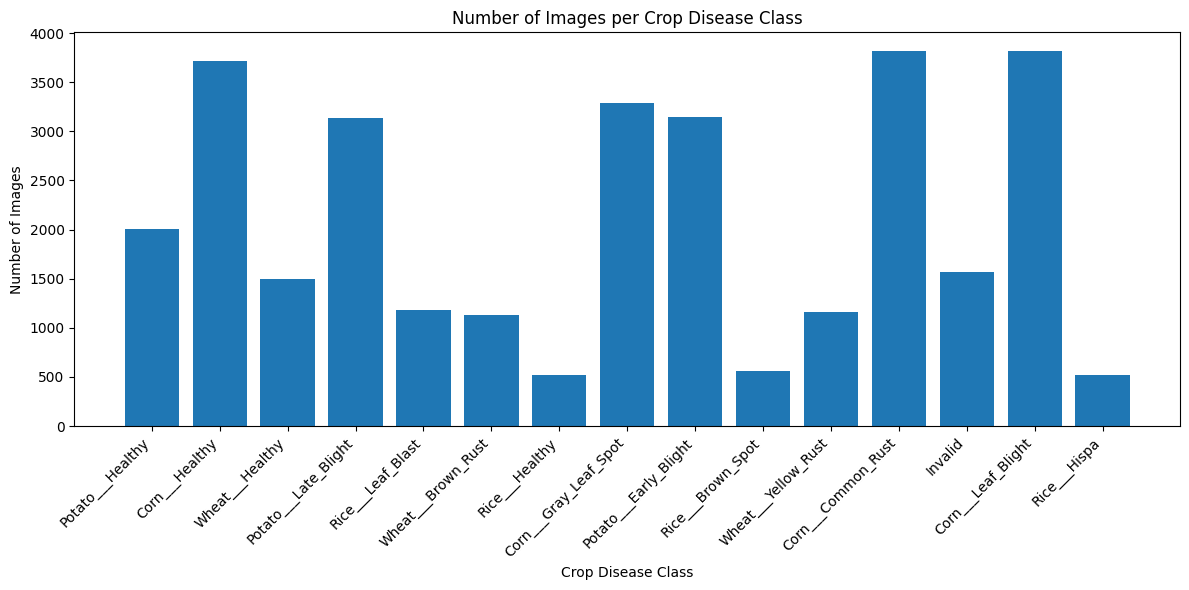

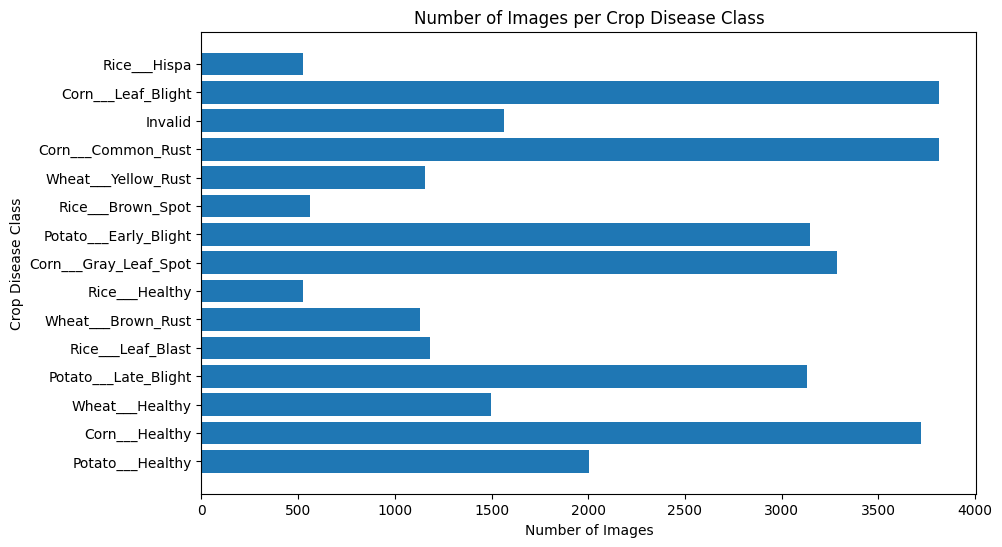

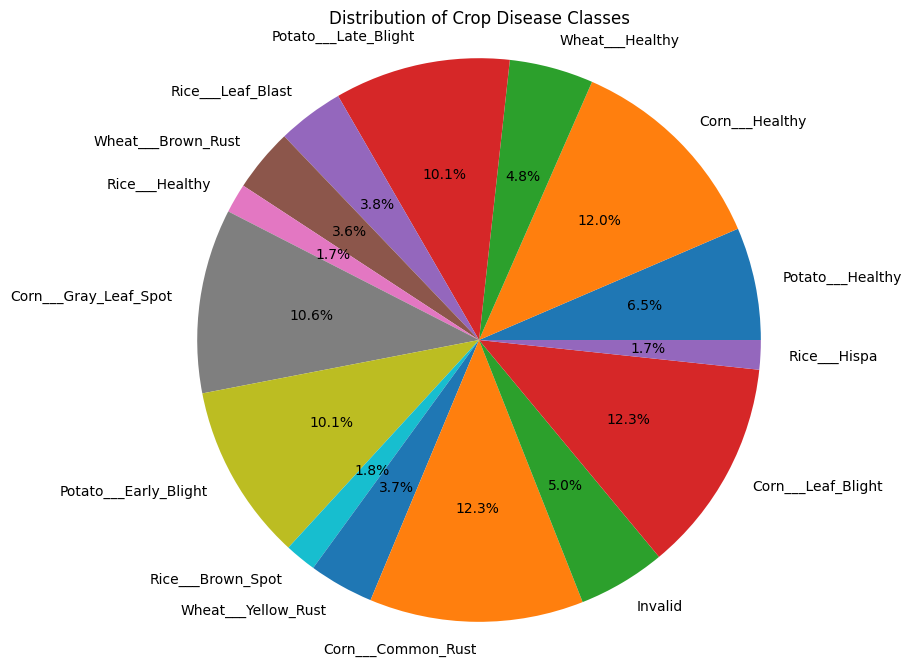

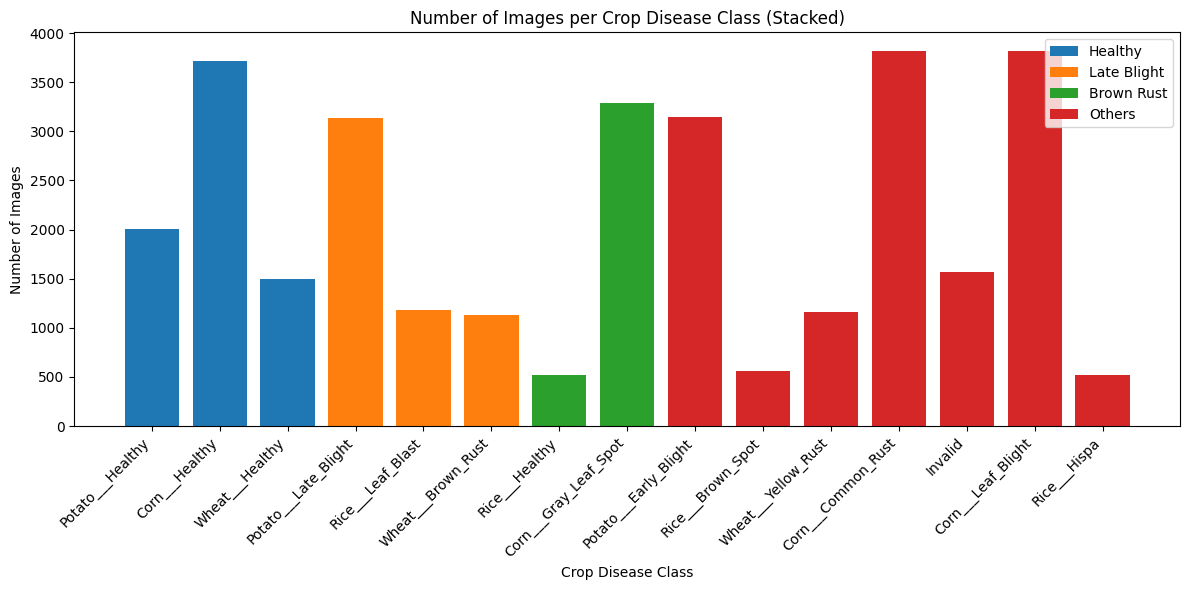

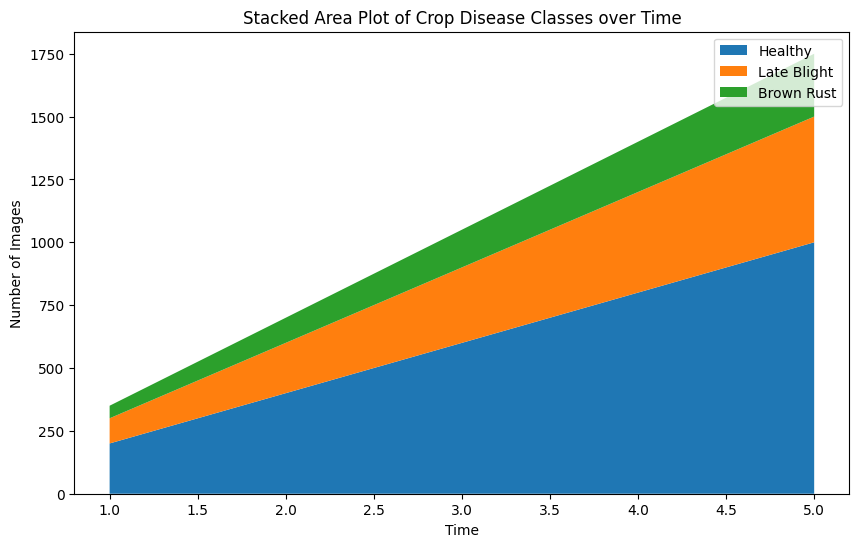

IndexError: ignored

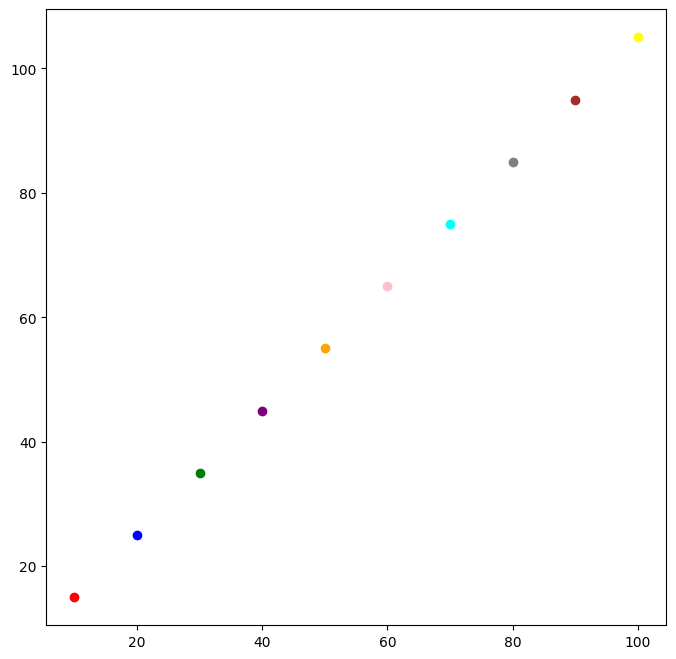

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Class names and labels
labels = ['Potato___Healthy', 'Corn___Healthy', 'Wheat___Healthy', 'Potato___Late_Blight', 'Rice___Leaf_Blast',
          'Wheat___Brown_Rust', 'Rice___Healthy', 'Corn___Gray_Leaf_Spot', 'Potato___Early_Blight',
          'Rice___Brown_Spot', 'Wheat___Yellow_Rust', 'Corn___Common_Rust', 'Invalid', 'Corn___Leaf_Blight',
          'Rice___Hispa']

num_images_per_class = [2006, 3718, 1497, 3131, 1182, 1128, 523, 3284, 3149, 563, 1156, 3814, 1563, 3816, 523]

# Bar Chart showing the number of images per class (Vertical)
plt.figure(figsize=(12, 6))
plt.bar(labels, num_images_per_class)
plt.xlabel('Crop Disease Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Crop Disease Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar Chart showing the number of images per class (Horizontal)
plt.figure(figsize=(10, 6))
plt.barh(labels, num_images_per_class)
plt.xlabel('Number of Images')
plt.ylabel('Crop Disease Class')
plt.title('Number of Images per Crop Disease Class')
plt.show()

# Pie Chart showing the distribution of classes
plt.figure(figsize=(8, 8))
plt.pie(num_images_per_class, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Crop Disease Classes')
plt.axis('equal')
plt.show()

# Stacked Bar Chart
plt.figure(figsize=(12, 6))
plt.bar(labels[:3], num_images_per_class[:3], label='Healthy')
plt.bar(labels[3:6], num_images_per_class[3:6], label='Late Blight')
plt.bar(labels[6:8], num_images_per_class[6:8], label='Brown Rust')
plt.bar(labels[8:], num_images_per_class[8:], label='Others')
plt.xlabel('Crop Disease Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Crop Disease Class (Stacked)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Area Plot (Stacked)
time = range(1, 6)
healthy_data = [200, 400, 600, 800, 1000]
blight_data = [100, 200, 300, 400, 500]
rust_data = [50, 100, 150, 200, 250]

plt.figure(figsize=(10, 6))
plt.stackplot(time, healthy_data, blight_data, rust_data, labels=['Healthy', 'Late Blight', 'Brown Rust'])
plt.xlabel('Time')
plt.ylabel('Number of Images')
plt.title('Stacked Area Plot of Crop Disease Classes over Time')
plt.legend()
plt.show()

# Scatter Plot with Color-Coded Classes
x_coords = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_coords = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105]
class_colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'cyan', 'gray', 'brown', 'yellow']

plt.figure(figsize=(8, 8))
for i in range(len(labels)):
    plt.scatter(x_coords[i], y_coords[i], c=class_colors[i], label=labels[i])
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Scatter Plot of Crop Disease Classes')
plt.legend()
plt.show()

# Box Plot
class_data = [np.random.randn(100) for _ in range(len(labels))]

plt.figure(figsize=(10, 6))
plt.boxplot(class_data, labels=labels)
plt.xlabel('Crop Disease Class')
plt.ylabel('Data Distribution')
plt.title('Box Plot of Crop Disease Classes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Violin Plot
class_data = [np.random.randn(100) for _ in range(len(labels))]

plt.figure(figsize=(10, 6))
plt.violinplot(class_data)
plt.xlabel('Crop Disease Class')
plt.ylabel('Data Distribution')
plt.title('Violin Plot of Crop Disease Classes')
plt.xticks(range(1, len(labels) + 1), labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Heatmap
heatmap_data = np.random.rand(len(labels), len(labels))

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', xticklabels=labels, yticklabels=labels)
plt.xlabel('Crop Disease Class')
plt.ylabel('Crop Disease Class')
plt.title('Heatmap of Crop Disease Class Relationships')
plt.show()


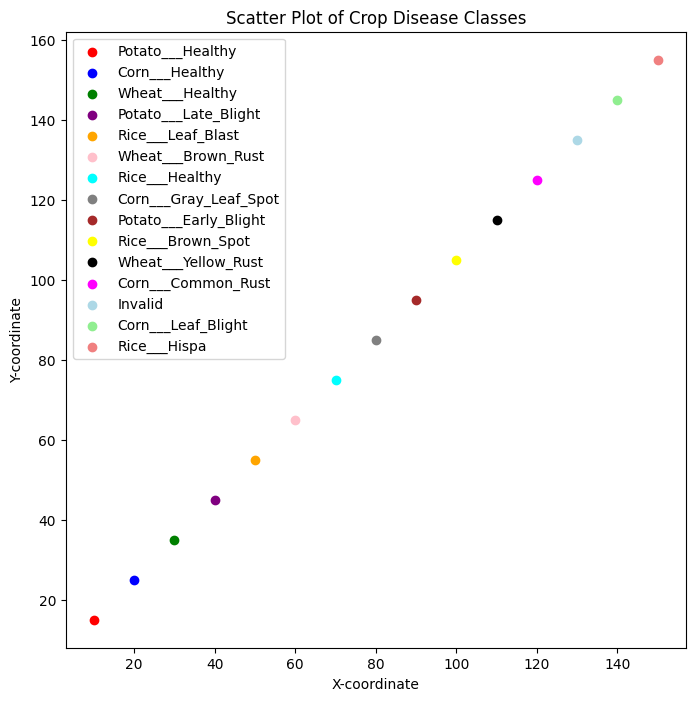

In [3]:
import matplotlib.pyplot as plt

# Class names and labels
labels = ['Potato___Healthy', 'Corn___Healthy', 'Wheat___Healthy', 'Potato___Late_Blight', 'Rice___Leaf_Blast',
          'Wheat___Brown_Rust', 'Rice___Healthy', 'Corn___Gray_Leaf_Spot', 'Potato___Early_Blight',
          'Rice___Brown_Spot', 'Wheat___Yellow_Rust', 'Corn___Common_Rust', 'Invalid', 'Corn___Leaf_Blight',
          'Rice___Hispa']

# Sample x and y coordinates for each class (replace with actual data)
x_coords = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
y_coords = [15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115, 125, 135, 145, 155]

class_colors = {
    'Potato___Healthy': 'red',
    'Corn___Healthy': 'blue',
    'Wheat___Healthy': 'green',
    'Potato___Late_Blight': 'purple',
    'Rice___Leaf_Blast': 'orange',
    'Wheat___Brown_Rust': 'pink',
    'Rice___Healthy': 'cyan',
    'Corn___Gray_Leaf_Spot': 'gray',
    'Potato___Early_Blight': 'brown',
    'Rice___Brown_Spot': 'yellow',
    'Wheat___Yellow_Rust': 'black',
    'Corn___Common_Rust': 'magenta',
    'Invalid': 'lightblue',
    'Corn___Leaf_Blight': 'lightgreen',
    'Rice___Hispa': 'lightcoral'
}

plt.figure(figsize=(8, 8))
for i, label in enumerate(labels):
    plt.scatter(x_coords[i], y_coords[i], c=class_colors[label], label=label)
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('Scatter Plot of Crop Disease Classes')
plt.legend()
plt.show()


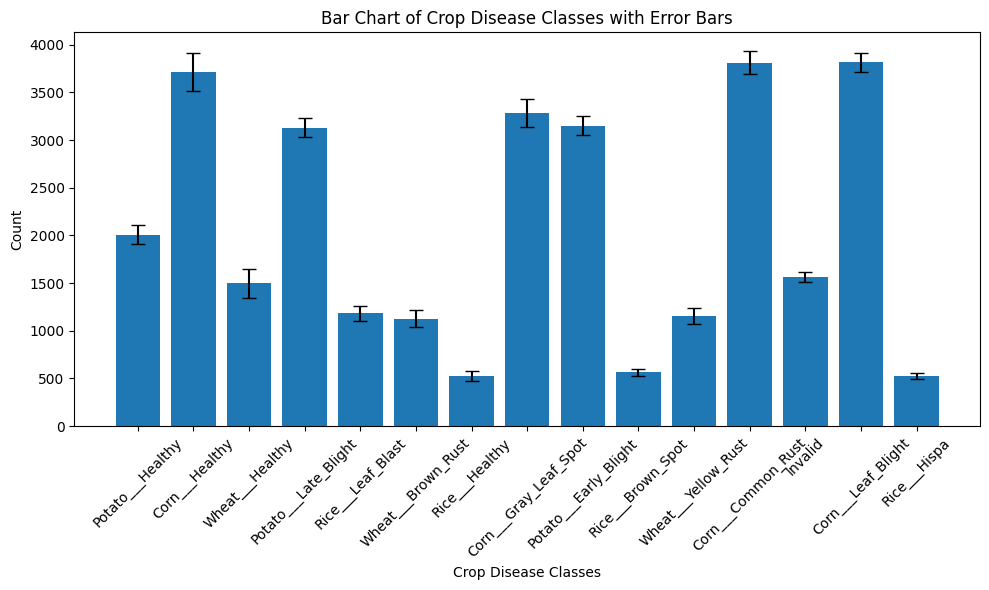

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Class names and labels
labels = ['Potato___Healthy', 'Corn___Healthy', 'Wheat___Healthy', 'Potato___Late_Blight', 'Rice___Leaf_Blast',
          'Wheat___Brown_Rust', 'Rice___Healthy', 'Corn___Gray_Leaf_Spot', 'Potato___Early_Blight',
          'Rice___Brown_Spot', 'Wheat___Yellow_Rust', 'Corn___Common_Rust', 'Invalid', 'Corn___Leaf_Blight',
          'Rice___Hispa']

# Sample data for bar chart with error bars
bar_data = [2006, 3718, 1497, 3131, 1182, 1128, 523, 3284, 3149, 563, 1156, 3814, 1563, 3816, 523]
errors = [100, 200, 150, 100, 80, 90, 50, 150, 100, 40, 80, 120, 50, 100, 30]

plt.figure(figsize=(10, 6))
plt.bar(labels, bar_data, yerr=errors, capsize=5)
plt.xlabel('Crop Disease Classes')
plt.ylabel('Count')
plt.title('Bar Chart of Crop Disease Classes with Error Bars')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Class names and labels
labels = ['Potato___Healthy', 'Corn___Healthy', 'Wheat___Healthy', 'Potato___Late_Blight', 'Rice___Leaf_Blast',
          'Wheat___Brown_Rust', 'Rice___Healthy', 'Corn___Gray_Leaf_Spot', 'Potato___Early_Blight',
          'Rice___Brown_Spot', 'Wheat___Yellow_Rust', 'Corn___Common_Rust', 'Invalid', 'Corn___Leaf_Blight',
          'Rice___Hispa']

# Sample data for each class (replace with actual data)
data = {
    'Potato___Healthy': 2006,
    'Corn___Healthy': 3718,
    'Wheat___Healthy': 1497,
    'Potato___Late_Blight': 3131,
    'Rice___Leaf_Blast': 1182,
    'Wheat___Brown_Rust': 1128,
    'Rice___Healthy': 523,
    'Corn___Gray_Leaf_Spot': 3284,
    'Potato___Early_Blight': 3149,
    'Rice___Brown_Spot': 563,
    'Wheat___Yellow_Rust': 1156,
    'Corn___Common_Rust': 3814,
    'Invalid': 1563,
    'Corn___Leaf_Blight': 3816,
    'Rice___Hispa': 523
}

# Plotting separate graphs for each class
for label in labels:
    plt.figure(figsize=(6, 4))
    plt.bar(label, data[label])
    plt.xlabel('Crop Disease Class')
    plt.ylabel('Count')
    plt.title(f'Class: {label}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


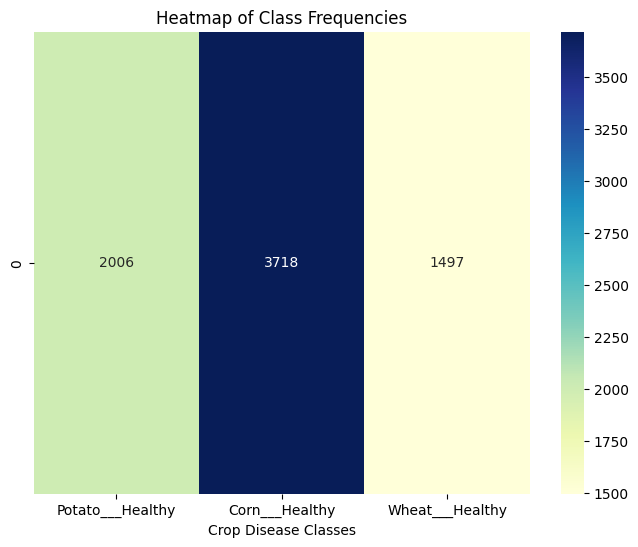

In [10]:
import seaborn as sns

# Sample data for class frequencies (replace with actual data)
class_frequencies = {
    'Potato___Healthy': 2006,
    'Corn___Healthy': 3718,
    'Wheat___Healthy': 1497,
    # Add frequencies for other classes...
}

# Create a list of class labels and frequencies
class_labels = list(class_frequencies.keys())
frequencies = list(class_frequencies.values())

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap([frequencies], annot=True, fmt='d', cmap='YlGnBu', xticklabels=class_labels)
plt.xlabel('Crop Disease Classes')
plt.title('Heatmap of Class Frequencies')
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
cm = confusion_matrix(test_data.classes, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)


disp.plot(cmap=plt.cm.Blues)
plt.show();

NameError: ignored

In [16]:
# Sample data for image attributes (replace with actual data)
image_attributes = {
    'Potato___Healthy': {
        'width': [64, 64, 63, ...],
        'height': [64, 64, 63, ...],
        'frequency': [2006, 2007, 2005, ...]
    },
    'Corn___Healthy': {
        'width': [63, 64, 65, ...],
        'height': [63, 64, 65, ...],
        'frequency': [3718, 3716, 3719, ...]
    },
    # Add attributes for other classes...
}

# Create a list of class labels
class_labels = list(image_attributes.keys())

# Plot the pairwise scatter plot
plt.figure(figsize=(12, 10))
for label in class_labels:
    attributes = image_attributes[label]
    plt.scatter(attributes['width'], attributes['height'], s=np.array(attributes['frequency']) // 50, label=label)

plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.title('Pairwise Scatter Plot of Image Widths and Heights')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


TypeError: ignored

<Figure size 1200x1000 with 0 Axes>